In [27]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os
from sklearn.linear_model import LinearRegression

os.makedirs('../figures', exist_ok = True)

# Define the relative path to the 'src' folder
module_path = os.path.abspath(os.path.join('..', 'src'))

# Add the path to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)

import analysis_utils as utils


In [28]:
df_od_age_group = pd.read_csv("../data/overdose_age_data_clean.csv")


In [29]:
df_od_age_group.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,age_group
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Sex,2,Male,2.1,2017,19,All ages,1.1,29.0,NaN,Male,All
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2006,8,All ages,1.1,11.5,NaN,All,All
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Sex,2,Male,2.1,2016,18,All ages,1.1,26.1,NaN,Male,All
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,1999,1,All ages,1.1,6.0,NaN,All,All
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN,All,All


In [30]:
# filter for all drug overdose deaths
all_od_deaths = df_od_age_group[df_od_age_group["PANEL_NUM"] == 0]
# filter for "All from age_group and sex 
all_od_deaths = all_od_deaths[(all_od_deaths["age_group"] == "All") & (all_od_deaths["sex"] == "All")]
all_od_deaths.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,age_group
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2006,8,All ages,1.1,11.5,NaN,All,All
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,1999,1,All ages,1.1,6.0,NaN,All,All
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN,All,All
5,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN,All,All
6,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN,All,All


In [31]:
# create a training set
train_od_deaths = all_od_deaths[all_od_deaths["YEAR"] < 2018]


In [32]:
#create a test set
test_od_deaths = all_od_deaths[all_od_deaths["YEAR"] == 2018]
test_od_deaths

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,age_group
2750,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0.1,2018,20,All ages,1.1,20.6,NaN,All,All


In [33]:
# make a LinearRegression model to predict future od deaths by year

d_pred = utils.fit_trend_model(train_od_deaths)
d_pred

{'slope': 0.7126315789473683,
 'intercept': -1418.9431578947367,
 'r_squared': 0.9159557672451121,
 'predictions': array([ 5.60736842,  6.32      ,  7.03263158,  7.74526316,  8.45789474,
         9.17052632,  9.88315789, 10.59578947, 11.30842105, 12.02105263,
        12.73368421, 13.44631579, 14.15894737, 14.87157895, 15.58421053,
        16.29684211, 17.00947368, 17.72210526, 18.43473684]),
 'years': array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])}

In [34]:

fit_slope = d_pred['slope']
fit_intercept = d_pred['intercept']
fit_R2 = d_pred['r_squared']


In [35]:
actual_df = all_od_deaths[all_od_deaths["YEAR"] == 2018].copy()
actual_df["PANEL"] = "Actual value"

In [36]:
# plot year vs estimated deaths for each sex

X = [x for x in range(1999, 2018+1)]
Y = [fit_slope * x + fit_intercept for x in X]
fit_str = 'y = %3.7s*x %3.7s'%(fit_slope, fit_intercept) + ' ; ' + 'R2 = %3.7s'%(fit_R2)
FIT_PANEL = [fit_str for i in X]
fit_df = pd.DataFrame({"YEAR" : X, "ESTIMATE" : Y, "PANEL" : FIT_PANEL})

pred_X = [2018]
pred_Y = [fit_slope * x + fit_intercept for x in pred_X]
pred_PANEL = ["Predicted value" for i in pred_X]
pred_df = pd.DataFrame({"YEAR" : pred_X, "ESTIMATE" : pred_Y, "PANEL" : pred_PANEL})

✓ Saved: figures/drug_overdose_prediction.png


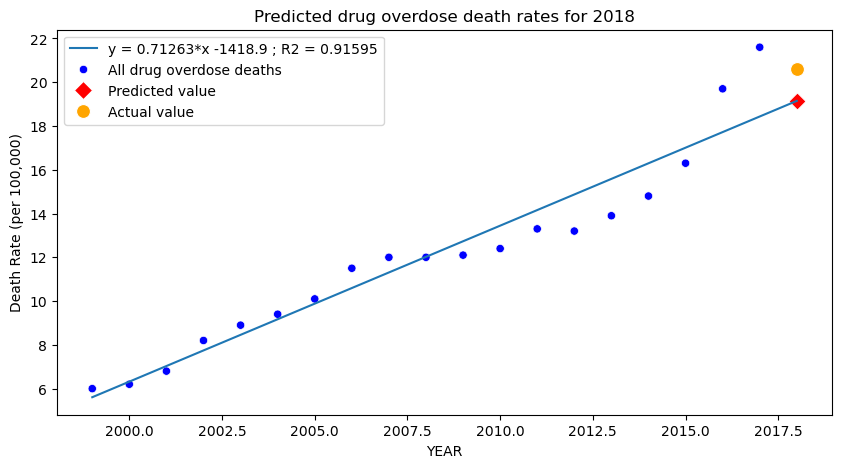

In [37]:

custom_palette = {
    'All drug overdose deaths' : 'blue',     # Hex code
    'Predicted value' : 'red',  # Hex code
    'Actual value' : 'orange',  # Hex code
    fit_str : 'green'
}

fig, ax = plt.subplots(figsize=(10, 5))
#sns.set(color_codes=True)
ax = sns.lineplot(data=fit_df, x="YEAR", y="ESTIMATE", hue="PANEL")

sns.scatterplot(data = train_od_deaths, x='YEAR', y='ESTIMATE', hue='PANEL',  palette=custom_palette)
sns.scatterplot(data = pred_df, x='YEAR', y='ESTIMATE', hue='PANEL', marker="D", s=75, palette=custom_palette)
sns.scatterplot(data = actual_df, x='YEAR', y='ESTIMATE', hue='PANEL', marker="o", s=100, palette=custom_palette)
# Add a legend and show the plot
ax.set_ylabel('Death Rate (per 100,000)')



# Get the current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a dictionary to store unique labels and handles, which automatically removes duplicates
# Using dict.fromkeys preserves the insertion order in Python 3.7+
unique_labels_handles = dict(zip(labels, handles))

# Extract the unique handles and labels
unique_handles = unique_labels_handles.values()
unique_labels = unique_labels_handles.keys()

# Apply the unique handles and labels to the legend
ax.legend(unique_handles, unique_labels, title='')


ax.set_title('Predicted drug overdose death rates for 2018')

fig.savefig('../figures/drug_overdose_prediction.png', dpi=300, bbox_inches='tight')
print("✓ Saved: figures/drug_overdose_prediction.png")


In [53]:
# make a prediction for 2018
year = pred_df["YEAR"].iloc[0]
prediction = pred_df["ESTIMATE"].iloc[0]
actual = actual_df["ESTIMATE"].iloc[0]
error = np.abs((prediction - actual) / actual) * 100
print(f"The prediction of the number of overdose deaths for {year} is {prediction:.3f} the actual is {actual:.3f} with a prediction error of {error:.3f}%" )

The prediction of the number of overdose deaths for 2018 is 19.147 the actual is 20.600 with a prediction error of 7.052%
